In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import pickle as pkl

In [2]:
data = pd.read_excel(r'Churn.xlsx')
data.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


# **EDA**

In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [4]:
data.shape

(5000, 20)

In [5]:
data.describe()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [6]:
data = data.replace('Nan',np.nan)

In [7]:
data.isnull().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

**To treat the missing values, we need to check the distribution of those columns.**

**Since data is normally distributed, we will replace the missing values with mean.**

In [9]:
data['day.charge'].fillna(value = data['day.charge'].mean(),inplace=True)
data['eve.mins'].fillna(value = data['eve.mins'].mean(),inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   float64
 12  eve.mins        5000 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [12]:
data['state'].nunique()

51

In [13]:
data['state'].value_counts()

state
WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: count, dtype: int64

# Converting to Region from State column

In [14]:
# Define state to region mapping
state_to_region = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
    'Midwest': ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
    'South': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'],
    'West': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']
}

# Create a reverse mapping from state to region
region_mapping = {}
for region, states in state_to_region.items():
    for state in states:
        region_mapping[state] = region

# Map the states to regions
data['Region'] = data['state'].map(region_mapping)

data.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,...,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,Region
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,...,45.07,197.4,99,16.78,244.7,91,11.01,1,no,Midwest
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,...,27.47,195.5,103,16.62,254.4,103,11.45,1,no,Midwest
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,...,41.38,121.2,110,10.30,162.6,104,7.32,0,no,Northeast
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,...,50.90,61.9,88,5.26,196.9,89,8.86,2,no,Midwest
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,...,28.34,148.3,122,12.61,186.9,121,8.41,3,no,South


In [15]:
data.Region.value_counts() # 2, 3, 0, 1

Region
South        1706
West         1233
Midwest      1158
Northeast     903
Name: count, dtype: int64

In [14]:
data['churn'] = data['churn'].map({'no': 0, 'yes': 1})

**Dropping state column**

In [18]:
data.drop(['state'], axis=1, inplace=True)
data.head()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,Region
0,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,Midwest
1,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,Midwest
2,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,Northeast
3,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,Midwest
4,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,South


In [19]:
data['area.code'].value_counts()

area.code
area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: count, dtype: int64

### DATA CLEANING

In [15]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# **MODEL BUILDING**

In [30]:
data.head()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,Region
0,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,Midwest
1,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,Midwest
2,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,Northeast
3,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,Midwest
4,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,South


In [31]:
data['area.code'].value_counts()

area.code
area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: count, dtype: int64

# Label Encoder

In [32]:
le = LabelEncoder()
for col in data.select_dtypes(include='object'):
  # Convert the column to string type before applying LabelEncoder
  data[col] = data[col].astype(str)
  data[col] = le.fit_transform(data[col])

data.head()

,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn,Region
0,1,128,1,25,0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0,0
1,1,107,1,26,0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0,0
2,1,137,0,0,0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0,1
3,0,84,0,0,1,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0,0
4,1,75,0,0,1,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0,2


In [33]:
data.Region.value_counts()

Region
2    1706
3    1233
0    1158
1     903
Name: count, dtype: int64

In [34]:
data['area.code'].value_counts()

area.code
1    2495
0    1259
2    1246
Name: count, dtype: int64

In [16]:
scaling_columns = ['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge',
   'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls','eve.charge',	'night.mins',
   'night.calls',	'night.charge' ]

# Scaling

In [17]:
scaler = StandardScaler()
data[scaling_columns] = scaler.fit_transform(data[scaling_columns])

In [18]:
# filename = 'scaling.sav'
# pkl.dump(scaler, open(filename,'wb'))

In [19]:
data.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,0.698941,yes,1.273145,no,-0.094809,-0.584236,-0.095509,1.573802,0.502824,1.574022,-0.063067,-0.060077,-0.063849,0.876999,-0.446928,0.876286,1,0
1,OH,area_code_415,0.169849,yes,1.346973,no,1.245227,-0.584236,1.245982,-0.346802,1.158422,-0.347581,-0.100744,0.141693,-0.101089,1.068992,0.154374,1.069818,1,0
2,NJ,area_code_415,0.925695,no,-0.572549,no,0.701969,0.229917,0.695971,1.171125,0.704546,1.171141,-1.574129,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0,0
3,OH,area_code_408,-0.409634,no,-0.572549,yes,-1.326194,1.044069,-1.329681,2.210292,-1.463971,2.210553,-2.750061,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,2,0
4,OK,area_code_415,-0.636388,no,-0.572549,yes,-0.058592,-0.584236,-0.055264,-0.252163,0.654116,-0.252593,-1.036730,1.100103,-1.034426,-0.267041,1.056327,-0.267307,3,0


In [20]:
x = data.drop('churn', axis=1)
y = data['churn']

In [21]:
x

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,KS,area_code_415,0.698941,yes,1.273145,no,-0.094809,-0.584236,-0.095509,1.573802,0.502824,1.574022,-0.063067,-0.060077,-0.063849,0.876999,-0.446928,0.876286,1
1,OH,area_code_415,0.169849,yes,1.346973,no,1.245227,-0.584236,1.245982,-0.346802,1.158422,-0.347581,-0.100744,0.141693,-0.101089,1.068992,0.154374,1.069818,1
2,NJ,area_code_415,0.925695,no,-0.572549,no,0.701969,0.229917,0.695971,1.171125,0.704546,1.171141,-1.574129,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0
3,OH,area_code_408,-0.409634,no,-0.572549,yes,-1.326194,1.044069,-1.329681,2.210292,-1.463971,2.210553,-2.750061,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,2
4,OK,area_code_415,-0.636388,no,-0.572549,yes,-0.058592,-0.584236,-0.055264,-0.252163,0.654116,-0.252593,-1.036730,1.100103,-1.034426,-0.267041,1.056327,-0.267307,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,-1.266260,yes,2.380562,no,-0.131027,0.229917,-0.135754,1.028239,1.360145,1.028112,0.444587,1.301873,0.443551,1.922073,0.805785,1.923114,2
4996,WV,area_code_415,1.303619,no,-0.572549,no,1.607399,-0.991312,1.608185,0.072577,-0.505789,0.071678,1.114848,-1.371585,1.111550,0.261434,0.655459,0.260505,3
4997,DC,area_code_415,-0.989116,no,-0.572549,no,1.209010,-0.177160,1.205738,-0.736489,-0.556220,-0.737361,-0.550890,1.402758,-0.550301,0.237683,-0.146277,0.238513,1
4998,DC,area_code_510,0.220239,no,-0.572549,no,-0.638067,0.636993,-0.632105,0.157937,-1.665694,0.157932,-0.572703,-0.413175,-0.573577,0.475200,-0.547145,0.476029,0


In [22]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: churn, Length: 5000, dtype: int64

# PCA

In [39]:
pca = PCA()
pc = pca.fit_transform(data.drop('churn', axis=1))

In [54]:
pc

array([[-2.06227598e+00,  1.59161362e-01,  4.54713660e-01, ...,
         5.14607870e-04,  6.35684131e-04,  5.03171321e-04],
       [ 1.98988155e-01, -1.98909230e+00,  1.26574206e+00, ...,
        -1.16651873e-04, -4.72648944e-04, -5.64153007e-04],
       [-8.72207299e-01, -1.07336751e+00, -2.44254206e+00, ...,
        -9.62671885e-04,  4.27560506e-03, -9.05291519e-04],
       ...,
       [ 8.86553927e-01, -1.97984396e+00, -2.15286853e-02, ...,
        -8.44910701e-04,  2.21961405e-03, -5.52917318e-04],
       [-1.14216990e+00, -1.43079953e-01,  1.07890938e-01, ...,
         1.94001485e-04, -4.23107156e-03, -5.80363567e-04],
       [ 2.20422309e+00,  1.52279817e+00,  7.71380855e-01, ...,
         1.44332669e-03,  1.81681051e-03, -1.10007174e-03]])

In [52]:
# filename = 'pca.sav'
# pkl.dump(pca, open(filename,'wb'))

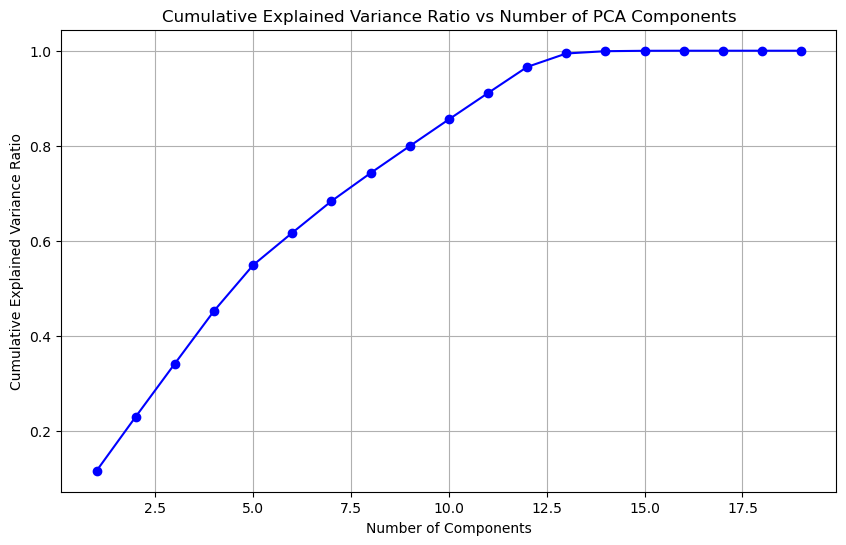

In [40]:
# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
# Plot the cumulative explained variance ratio
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of PCA Components')
plt.grid(True)
plt.show()

In [41]:
# Select the number of components that explain 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of components explaining 95% of the variance: {n_components}')

Number of components explaining 95% of the variance: 12


In [42]:
x_new = pc[:, 0:14]

In [53]:
x_new

array([[-2.06227598,  0.15916136,  0.45471366, ...,  0.30906333,
        -0.01165017, -0.11625109],
       [ 0.19898816, -1.9890923 ,  1.26574206, ..., -0.53138629,
         0.03174114, -0.11042715],
       [-0.8722073 , -1.07336751, -2.44254206, ...,  0.08067045,
        -0.05774176, -0.12056634],
       ...,
       [ 0.88655393, -1.97984396, -0.02152869, ..., -0.42298571,
         0.01113931, -0.08704303],
       [-1.1421699 , -0.14307995,  0.10789094, ...,  1.17052565,
        -1.03342819, -0.09482348],
       [ 2.20422309,  1.52279817,  0.77138085, ..., -1.06199605,
        -0.05982488, -0.11525069]])

In [43]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

### XGBoost

In [44]:
# Model Evaluation Function for XGBoost
def evaluate_xgboost(X_train, y_train, X_test, y_test, use_smote=False):
    if use_smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)

    model = XGBClassifier()
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    print(f"XGBoost - Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

In [45]:

# Evaluate XGBoost Without and With SMOTE
print("Evaluating XGBoost without SMOTE:")
evaluate_xgboost(X_train, y_train, X_test, y_test)

print("\nEvaluating XGBoost with SMOTE:")
evaluate_xgboost(X_train, y_train, X_test, y_test, use_smote=True)

Evaluating XGBoost without SMOTE:
XGBoost - Train Accuracy: 1.00, Test Accuracy: 0.93

Evaluating XGBoost with SMOTE:
XGBoost - Train Accuracy: 1.00, Test Accuracy: 0.92


In [46]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

In [47]:
X_train.shape, y_train.shape

((6864, 14), (6864,))

In [48]:
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"XGBoost - Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

XGBoost - Train Accuracy: 1.00, Test Accuracy: 0.93


In [50]:
# filename = 'model.sav'
# pkl.dump(model, open(filename,'wb'))

In [51]:
region = ['Midwest', 'Northeast', 'South', 'West']
state = 'Midwest'
state = region.index(state)
state

0